In [2]:
import pandas as pd
data = pd.read_csv('creditcard_2023.csv')
print(data.head())


   id        V1        V2        V3        V4        V5        V6        V7  \
0   0 -0.260648 -0.469648  2.496266 -0.083724  0.129681  0.732898  0.519014   
1   1  0.985100 -0.356045  0.558056 -0.429654  0.277140  0.428605  0.406466   
2   2 -0.260272 -0.949385  1.728538 -0.457986  0.074062  1.419481  0.743511   
3   3 -0.152152 -0.508959  1.746840 -1.090178  0.249486  1.143312  0.518269   
4   4 -0.206820 -0.165280  1.527053 -0.448293  0.106125  0.530549  0.658849   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0 -0.130006  0.727159  ... -0.110552  0.217606 -0.134794  0.165959  0.126280   
1 -0.133118  0.347452  ... -0.194936 -0.605761  0.079469 -0.577395  0.190090   
2 -0.095576 -0.261297  ... -0.005020  0.702906  0.945045 -1.154666 -0.605564   
3 -0.065130 -0.205698  ... -0.146927 -0.038212 -0.214048 -1.893131  1.003963   
4 -0.212660  1.049921  ... -0.106984  0.729727 -0.161666  0.312561 -0.414116   

        V26       V27       V28    Amount  C

In [4]:
print(data.isnull().sum())

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [16]:
from sklearn.preprocessing import StandardScaler
data['Amount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))

from sklearn.model_selection import train_test_split
X = data.drop(['Class'], axis=1)
y = data['Class']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Scale all features

# Split the scaled data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [18]:

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)


In [20]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


In [21]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)


In [30]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree classifier
dt = DecisionTreeClassifier(random_state=42)

# Train the model
dt.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = dt.predict(X_test)

In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score  # For evaluation metrics

# Evaluation function
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return accuracy, precision, recall, f1

In [34]:
log_reg_accuracy, log_reg_precision, log_reg_recall, log_reg_f1 = evaluate_model(y_test, y_pred_lr)

rf_accuracy, rf_precision, rf_recall, rf_f1 = evaluate_model(y_test, y_pred_rf)

dt_accuracy, dt_precision, dt_recall, dt_f1 = evaluate_model(y_test, y_pred_dt)

svm_accuracy, svm_precision, svm_recall, svm_f1 = evaluate_model(y_test, y_pred_svm)

In [36]:
print(f"Logistic Regression - Accuracy: {log_reg_accuracy}, Precision: {log_reg_precision}, Recall: {log_reg_recall}, F1: {log_reg_f1}")

Logistic Regression - Accuracy: 0.9983908692823101, Precision: 0.9988055296948831, Recall: 0.9979816062903679, F1: 0.9983933980071112


In [38]:
print(f"Random Forest - Accuracy: {rf_accuracy}, Precision: {rf_precision}, Recall: {rf_recall}, F1: {rf_f1}")


Random Forest - Accuracy: 0.9998241387193781, Precision: 0.9999122283467331, Recall: 0.9997367312552654, F1: 0.9998244720998403


In [40]:
print(f"Decision Tree - Accuracy: {dt_accuracy}, Precision: {dt_precision}, Recall: {dt_recall}, F1: {dt_f1}")


Decision Tree - Accuracy: 0.9995779329265075, Precision: 0.999508634002527, Recall: 0.9996489750070205, F1: 0.9995787995787996


In [42]:
print(f"SVM - Accuracy: {svm_accuracy}, Precision: {svm_precision}, Recall: {svm_recall}, F1: {svm_f1}")

SVM - Accuracy: 0.9996746566308495, Precision: 0.9997191553597444, Recall: 0.9996314237573716, F1: 0.9996752876337245


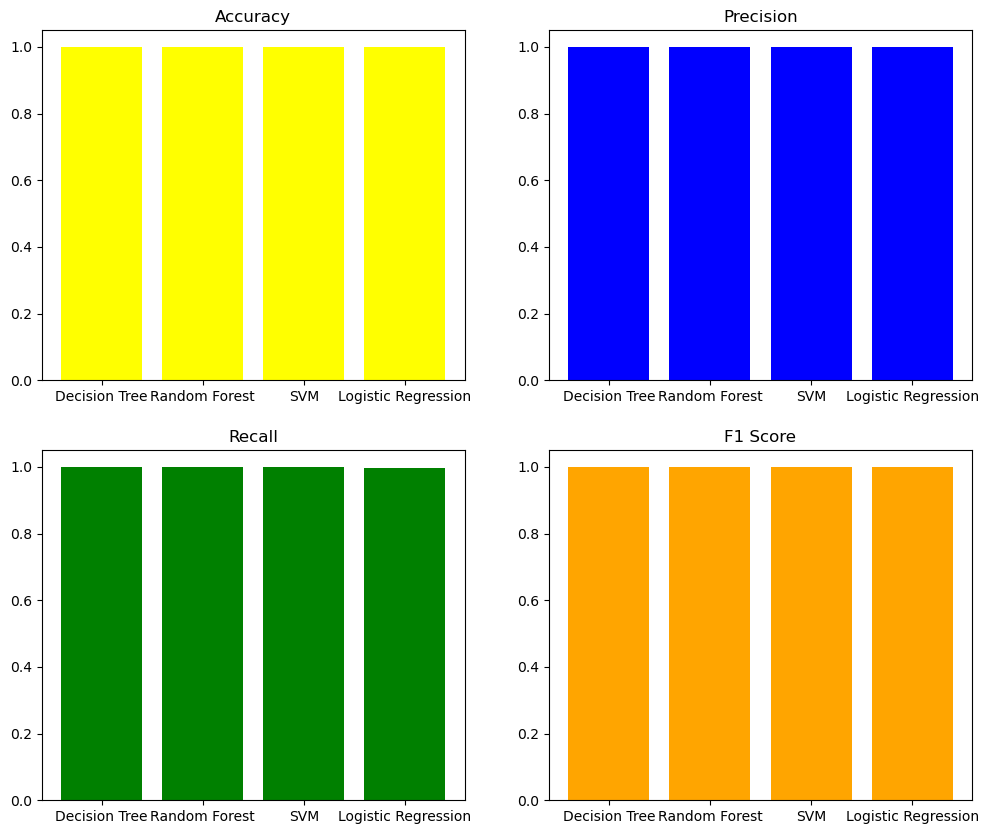

In [54]:
import matplotlib.pyplot as plt

# Models and their corresponding evaluation metrics
models = ['Decision Tree', 'Random Forest', 'SVM', 'Logistic Regression']
accuracies = [dt_accuracy, rf_accuracy, svm_accuracy, log_reg_accuracy]
precisions = [dt_precision, rf_precision, svm_precision, log_reg_precision]
recalls = [dt_recall, rf_recall, svm_recall, log_reg_recall]
f1_scores = [dt_f1, rf_f1, svm_f1, log_reg_f1]

# Create a 2x2 subplots for the different evaluation metrics
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot Accuracy
axes[0, 0].bar(models, accuracies, color='yellow')
axes[0, 0].set_title('Accuracy')

# Plot Precision
axes[0, 1].bar(models, precisions, color='blue')
axes[0, 1].set_title('Precision')

# Plot Recall
axes[1, 0].bar(models, recalls, color='green')
axes[1, 0].set_title('Recall')

# Plot F1 Score
axes[1, 1].bar(models, f1_scores, color='orange')
axes[1, 1].set_title('F1 Score')


plt.show()
